## Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load Data set

In [3]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_test_df = pd.read_csv('titanic_test.csv')

In [4]:
titanic_df.shape, titanic_test_df.shape

((891, 12), (418, 11))

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Creat a list of  train and test data set for data preparation

In [9]:
titanic_datalist = [titanic_df, titanic_test_df]

## Check for missing values

In [10]:
print("\n Training data with null values")
titanic_df.isnull().sum()


 Training data with null values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
print("\n Test data with null values")
titanic_test_df.isnull().sum()


 Test data with null values


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Cunningham, Mr. Alfred Fleming",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Missing data Clean up


### 1. Drop cabin column as it contains mostly missing data
### 2. Drop PassenderId and Ticket columns from train data set
### 3. Impute Age with median
### 4. Impute Embarked woth mode as it is categorical data
### 5. Impute Fare with median


In [13]:
titanic_df.drop(columns=['PassengerId','Ticket', 'Cabin'], axis=1, inplace=True)

In [14]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [15]:
# Imputation
for data in titanic_datalist:
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data['Fare'].fillna(data['Fare'].median(), inplace= True)

In [16]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
titanic_test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## Feature Engineering for the data set

In [18]:
titanic_df['Name'].str.split(", ", expand =True)[1].str.split(".", expand=True)[0].value_counts()


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Ms                1
Capt              1
Mme               1
Lady              1
the Countess      1
Sir               1
Jonkheer          1
Don               1
Name: 0, dtype: int64

In [19]:
for data in titanic_datalist:
    #Create FamilySize from variables SibSp and Parch
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    # Create Column IsAlone such that 1 if family size = 1 else 0 
    data['IsAlone']= 1    
    data['IsAlone'].loc[data['FamilySize'] > 1] = 0
    # Split the title from name to get Title column
    data['Title'] = data['Name'].str.split(", ",expand=True)[1].str.split(".", expand=True)[0]    
    # bin Fare and Age columns
    data['AgeBin'] = pd.cut(data['Age'].astype(int),5)
    data['FareBin'] = pd.qcut(data['Fare'], 4)
    

In [20]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,AgeBin,FareBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(16.0, 32.0]","(-0.001, 7.91]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(32.0, 48.0]","(31.0, 512.329]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(16.0, 32.0]","(7.91, 14.454]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(32.0, 48.0]","(31.0, 512.329]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(32.0, 48.0]","(7.91, 14.454]"


In [21]:
titanic_df['IsAlone'].value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

In [22]:
titanic_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Ms                1
Capt              1
Mme               1
Lady              1
the Countess      1
Sir               1
Jonkheer          1
Don               1
Name: Title, dtype: int64

In [23]:
#create a true or false series with title as index
titles = (titanic_df['Title'].value_counts() < 10) 
titles

Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Mlle             True
Major            True
Col              True
Ms               True
Capt             True
Mme              True
Lady             True
the Countess     True
Sir              True
Jonkheer         True
Don              True
Name: Title, dtype: bool

In [24]:
titles_test = (titanic_test_df['Title'].value_counts() < 10) 

In [25]:
# Clean up Title by re-classifying the rare title names
titanic_df['Title'] = titanic_df['Title'].apply(lambda x: 'Misc' if titles.loc[x] == True else x)
titanic_test_df['Title'] = titanic_test_df['Title'].apply(lambda x: 'Misc' if titles_test.loc[x] == True else x)

In [26]:
titanic_df['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

In [27]:
titanic_test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Misc        7
Name: Title, dtype: int64

In [28]:
#preview data again
titanic_df.info()

titanic_df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
AgeBin        891 non-null category
FareBin       891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,AgeBin,FareBin
869,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,11.1333,S,3,0,Master,"(-0.08, 16.0]","(7.91, 14.454]"
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,16.0000,S,1,1,Mrs,"(48.0, 64.0]","(14.454, 31.0]"
767,0,3,"Mangan, Miss. Mary",female,30.5,0,0,7.7500,Q,1,1,Miss,"(16.0, 32.0]","(-0.001, 7.91]"
234,0,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,10.5000,S,1,1,Mr,"(16.0, 32.0]","(7.91, 14.454]"
409,0,3,"Lefebre, Miss. Ida",female,28.0,3,1,25.4667,S,5,0,Miss,"(16.0, 32.0]","(14.454, 31.0]"
461,0,3,"Morley, Mr. William",male,34.0,0,0,8.0500,S,1,1,Mr,"(32.0, 48.0]","(7.91, 14.454]"
176,0,3,"Lefebre, Master. Henry Forbes",male,28.0,3,1,25.4667,S,5,0,Master,"(16.0, 32.0]","(14.454, 31.0]"
154,0,3,"Olsen, Mr. Ole Martin",male,28.0,0,0,7.3125,S,1,1,Mr,"(16.0, 32.0]","(-0.001, 7.91]"
109,1,3,"Moran, Miss. Bertha",female,28.0,1,0,24.1500,Q,2,0,Miss,"(16.0, 32.0]","(14.454, 31.0]"
557,0,1,"Robbins, Mr. Victor",male,28.0,0,0,227.5250,C,1,1,Mr,"(16.0, 32.0]","(31.0, 512.329]"


In [29]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'IsAlone', 'Title', 'AgeBin', 'FareBin'],
      dtype='object')

## Exploratory Data Analysis

Text(0.5, 1.0, 'Box plot of Fare')

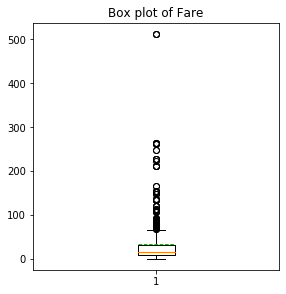

In [30]:
#graph distribution of quantitative data
plt.figure(figsize=[15,10])
plt.subplot(231)
plt.boxplot(titanic_df['Fare'], showmeans = True, meanline = True)
plt.title("Box plot of Fare")

Text(0.5, 1.0, 'Box plot of Age')

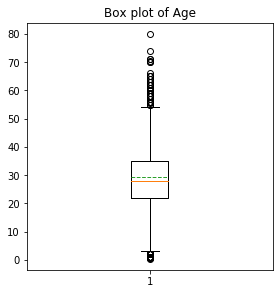

In [31]:
plt.figure(figsize=[15,10])
plt.subplot(231)
plt.boxplot(titanic_df['Age'], showmeans = True, meanline = True)
plt.title("Box plot of Age")

Text(0.5, 1.0, 'Box plot of FamilySize')

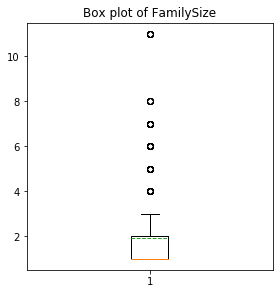

In [32]:
plt.figure(figsize=[15,10])
plt.subplot(231)
plt.boxplot(titanic_df['FamilySize'], showmeans = True, meanline = True)
plt.title("Box plot of FamilySize")

Text(0.5, 1.0, 'Sex Vs IsAlone Survival Comparison')

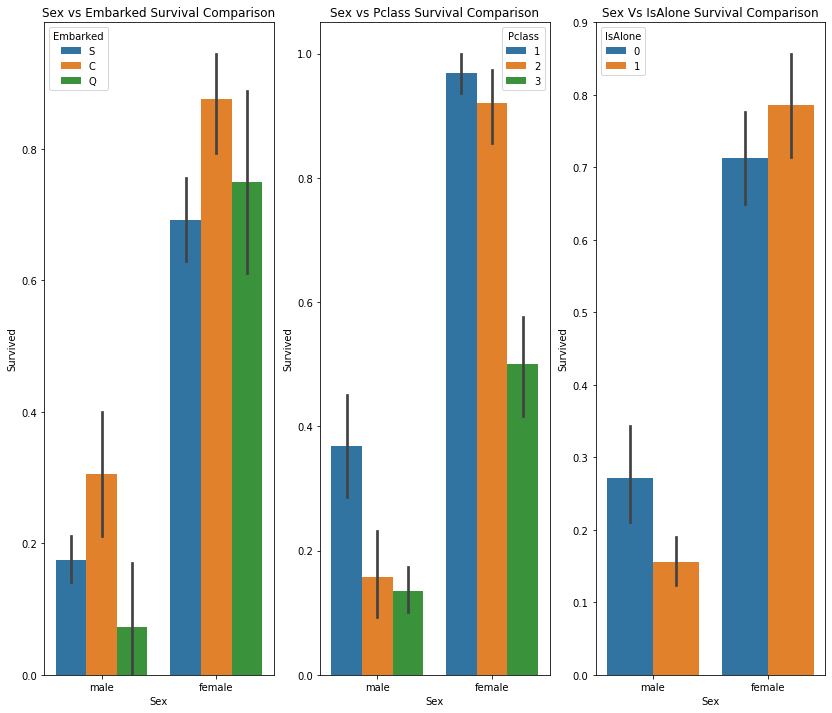

In [33]:
#graph distribution of qualitative data: Sex
#we know sex mattered in survival, now let's compare sex and a 2nd feature
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sn.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=titanic_df, ax = qaxis[0])
qaxis[0].set_title('Sex vs Embarked Survival Comparison')

sn.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=titanic_df, ax = qaxis[1])
qaxis[1].set_title('Sex vs Pclass Survival Comparison')

sn.barplot(x='Sex', y='Survived', hue= 'IsAlone', data=titanic_df, ax = qaxis[2])
qaxis[2].set_title('Sex Vs IsAlone Survival Comparison')

#### Note: Females from class 1 & 2 and those in embarked category C are mostly survived.

Text(0.5, 1.0, 'Sex Vs Title Survival comparison')

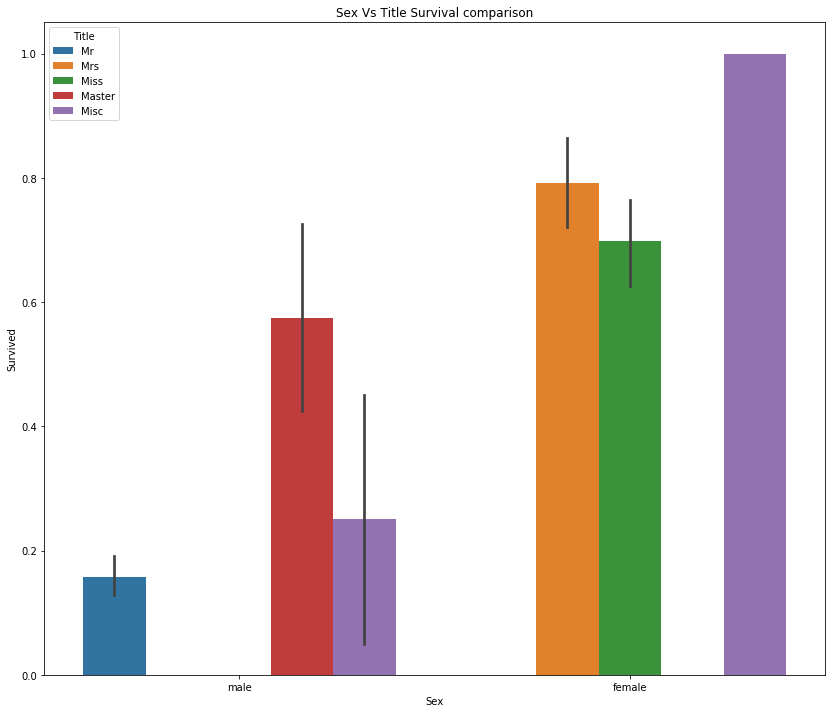

In [34]:
fig, axis1 = plt.subplots(1,1,figsize=(14,12))
sn.barplot(x='Sex', y='Survived', hue='Title', data=titanic_df, ax=axis1)
axis1.set_title("Sex Vs Title Survival comparison")

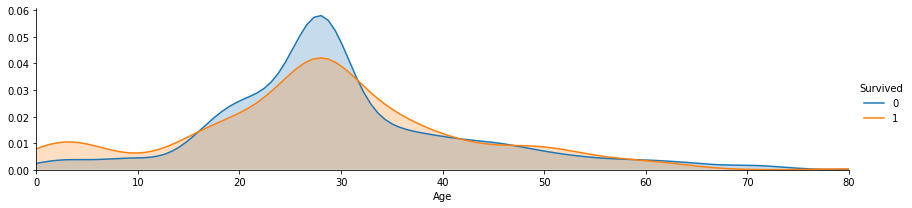

In [35]:
# plot distributions of age of passengers who survived or did not survive
a=sn.FacetGrid(titanic_df, hue='Survived', aspect=4)
a.map(sn.kdeplot, 'Age', shade=True)
a.set(xlim=(0,titanic_df['Age'].max()))
a.add_legend()

### Note: From the distribution plot it can be observed that most people from category of kids and middle aged(between 32 to 40) people are survived. On the other hand,  survival rate is less compared among youngesters(between 18 to 30 years).

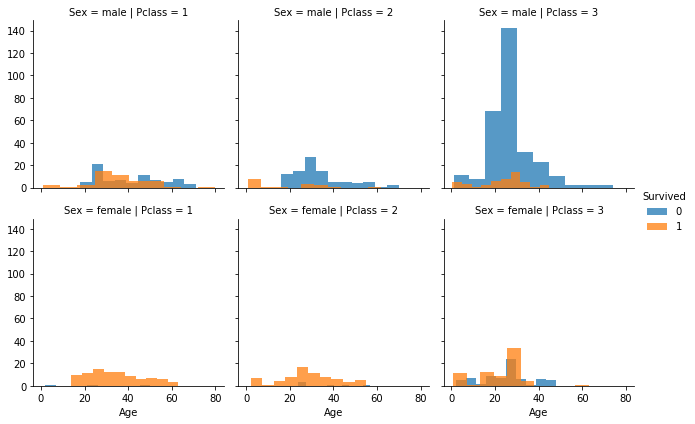

In [36]:
h = sn.FacetGrid(titanic_df, row = 'Sex', col = 'Pclass', hue='Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

### Note: Females from Pclass 1 & 2 are survived. The detah rate is more in Pclass 3,  particularly males.

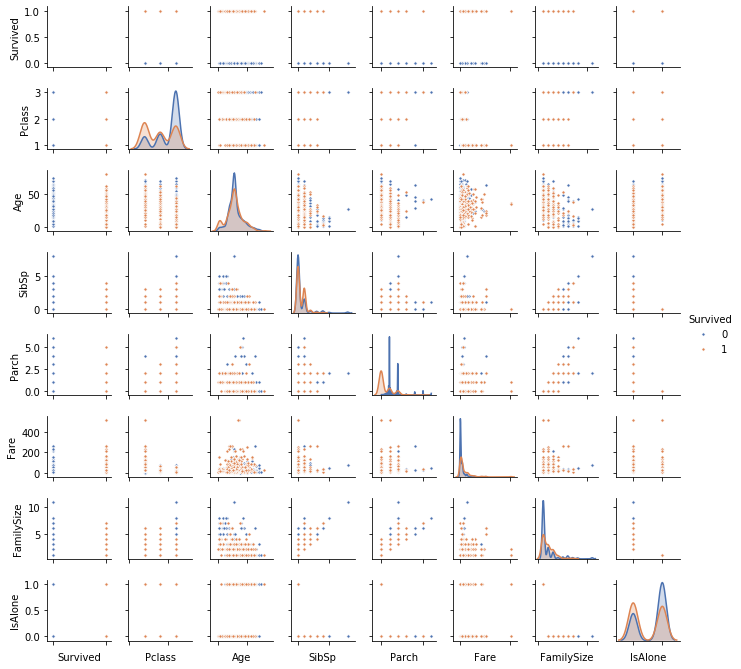

In [37]:
#pair plots of entire dataset
pp = sn.pairplot(titanic_df, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10)  )
pp.set(xticklabels=[])

In [38]:
corr= titanic_df.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.016639,-0.203367
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.065997,0.135207
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.245619,0.171647
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.890712,-0.584471
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.783111,-0.583398
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.217138,-0.271832
FamilySize,0.016639,0.065997,-0.245619,0.890712,0.783111,0.217138,1.000000,-0.690922
IsAlone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,-0.690922,1.000000


Text(0.5, 1.05, 'Pearson Correlation of Features')

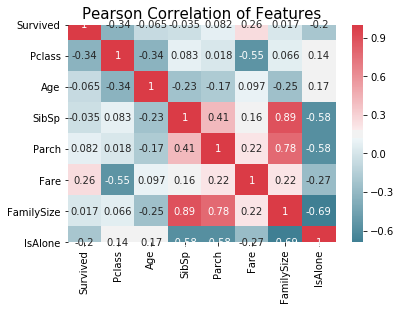

In [39]:
colour_map = sn.diverging_palette(220,10, as_cmap= True)
sn.heatmap(corr, cmap=colour_map, annot=True, linecolor='White')
plt.title('Pearson Correlation of Features', y=1.05, size=15)

## Create Dummy for categorical data

In [40]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'IsAlone', 'Title', 'AgeBin', 'FareBin'],
      dtype='object')

In [41]:
Target= ['Survived']
X_Features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked', 'FamilySize', 'IsAlone', 'Title']
data1_xy =  Target + X_Features

In [42]:
# Create Dummies
titanic_dummy = pd.get_dummies(titanic_df[X_Features])
titanic_test_dummy = pd.get_dummies(titanic_test_df[X_Features])

In [43]:
titanic_dummy.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,22.0,1,0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,38.0,1,0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,26.0,0,0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,35.0,1,0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,35.0,0,0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [44]:
titanic_test_dummy.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,1,1,0,1,0,1,0,0,0,0,1,0
1,3,47.0,1,0,7.0000,2,0,1,0,0,0,1,0,0,0,0,1
2,2,62.0,0,0,9.6875,1,1,0,1,0,1,0,0,0,0,1,0
3,3,27.0,0,0,8.6625,1,1,0,1,0,0,1,0,0,0,1,0
4,3,22.0,1,1,12.2875,3,0,1,0,0,0,1,0,0,0,0,1


In [45]:
titanic_dummy.shape, titanic_test_dummy.shape

((891, 17), (418, 17))

### Standardize the numeric features

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'IsAlone', 'Title', 'AgeBin', 'FareBin'],
      dtype='object')

In [48]:
from sklearn.preprocessing import StandardScaler
scalar_X = StandardScaler()
titanic_df_scaled = scalar_X.fit_transform(titanic_dummy)
titanic_test_df_scaled = scalar_X.transform(titanic_test_dummy)


### Split the training data set into train and test data

In [49]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(titanic_df_scaled, titanic_df['Survived'], test_size=.25, random_state=42 )


In [50]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((668, 17), (668,), (223, 17), (223,))

## Model Building

In [51]:
from sklearn.linear_model import LogisticRegression
lg_reg= LogisticRegression().fit(train_X, train_y)

In [52]:
lg_reg.coef_

array([[-0.70124598, -0.21021933, -0.40109212, -0.19287139,  0.25474763,
        -0.37048803, -0.16442119,  0.68990291, -0.68990291,  0.10688212,
         0.00372564, -0.09597768,  0.64643389, -0.00628187, -0.19127808,
        -0.223377  ,  0.15715071]])

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [54]:
pred_y = lg_reg.predict(test_X)

In [55]:
accuracy_score(test_y,pred_y)

0.8161434977578476

In [56]:
# Obtain confusion matrics
def get_metrics(test_y, pred_y):
    cm = confusion_matrix(y_true=test_y, y_pred=pred_y)
    print('Confusion matrix:\n', cm)
    labels = ['Not Survived', 'Survived']
    colour_map = sn.diverging_palette(220,10, as_cmap= True)
    sn.heatmap(cm, cmap=colour_map, annot=True, fmt='d',  linecolor='White')
    plt.title('Confusion Matrics', y=1.05, size=15)
    return

Confusion matrix:
 [[114  20]
 [ 21  68]]


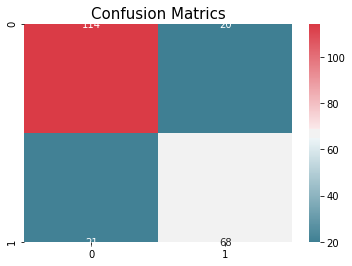

In [57]:
get_metrics(test_y, pred_y)

In [58]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       134
           1       0.77      0.76      0.77        89

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



## Tune Hyper parameters to get best results

In [59]:
# Hyper Parameter turning
from sklearn.model_selection import GridSearchCV

In [60]:
# LR Parameter turning
model = LogisticRegression()
penalty = ['l1', 'l2']
C = [1, 0.1, 0.01, 10, 100, 1000]
hyperparameter = dict(C=C , penalty= penalty)
#Find the model using Grid Search
clf = GridSearchCV(model, hyperparameter, cv=10, verbose=0)
#best model
best_model = clf.fit(train_X, train_y)


In [61]:
best_model.best_estimator_.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [62]:
lg_reg_tuned= LogisticRegression(C= 1, penalty= 'l2').fit(train_X, train_y)

In [63]:
pred_y = lg_reg_tuned.predict(test_X)

In [64]:
accuracy_score(test_y,pred_y)

0.8161434977578476

Confusion matrix:
 [[114  20]
 [ 21  68]]


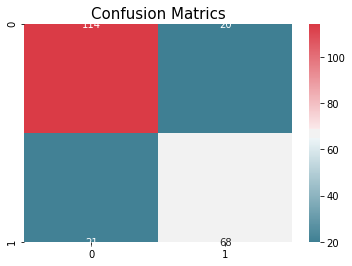

In [65]:
get_metrics(test_y, pred_y)

## 2. Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4).fit(train_X,train_y)

In [67]:
pred_y_dt = dt.predict(test_X)

In [68]:
accuracy_score(test_y,pred_y_dt)

0.8385650224215246

Confusion matrix:
 [[120  14]
 [ 22  67]]


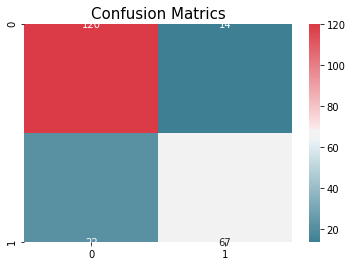

In [69]:
get_metrics(test_y,pred_y_dt)

In [70]:
dt.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')>

In [71]:
# Hyper Parameter turning for Random Forest
dt1=DecisionTreeClassifier()
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3,4,5, 8, 9],                          
              "criterion": ["gini", "entropy"]}

# run randomized search
dt_gcv = GridSearchCV(dt1, param_dist, cv=10, verbose=0)
dt_gcv.fit(train_X, train_y)

#best model
best_model = dt_gcv.fit(train_X, train_y)
best_model.best_estimator_.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')>

In [72]:
dt_tuned = DecisionTreeClassifier(criterion='gini', max_depth=4).fit(train_X, train_y)

In [73]:

pred_y_dt2 = dt_tuned.predict(test_X)

In [74]:
accuracy_score(test_y,pred_y_dt2)

0.8385650224215246

Confusion matrix:
 [[120  14]
 [ 22  67]]


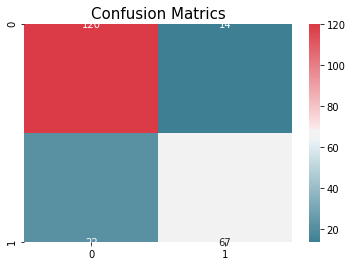

In [75]:
get_metrics(test_y,pred_y_dt2)

In [76]:
print(classification_report(test_y,pred_y_dt2))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       134
           1       0.83      0.75      0.79        89

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



## Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [78]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [79]:
# Hyper Parameter turning for Random Forest
rfc=RandomForestClassifier(random_state=42)
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, 8, 9],                          
              "n_estimators": [10,50,100],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)
random_search.fit(train_X, train_y)

report(random_search.cv_results_)


Model with rank: 1
Mean validation score: 0.829 (std: 0.041)
Parameters: {'n_estimators': 100, 'max_depth': 8, 'criterion': 'entropy', 'bootstrap': False}

Model with rank: 1
Mean validation score: 0.829 (std: 0.041)
Parameters: {'n_estimators': 10, 'max_depth': 9, 'criterion': 'entropy', 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.828 (std: 0.027)
Parameters: {'n_estimators': 50, 'max_depth': 3, 'criterion': 'gini', 'bootstrap': False}



In [90]:
# Random forest with tuned hyper parameters
rf_tuned = RandomForestClassifier(n_estimators=10, max_depth=9, criterion='entropy', bootstrap= True).fit(train_X, train_y )


In [91]:
pred_y_rf = rf_tuned.predict(test_X)

In [92]:
accuracy_score(test_y, pred_y_rf)

0.8116591928251121

Confusion matrix:
 [[114  20]
 [ 22  67]]


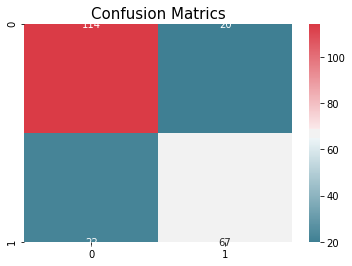

In [93]:
get_metrics(test_y, pred_y_rf)

In [94]:
print(classification_report(test_y, pred_y_rf))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       134
           1       0.77      0.75      0.76        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



### Note:  From the above models Decision Tree has the best score 83.85 on test data

## Prediction using the model on validation data set

In [95]:
titanic_test_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
Pclass          418 non-null int64
Age             418 non-null float64
SibSp           418 non-null int64
Parch           418 non-null int64
Fare            418 non-null float64
FamilySize      418 non-null int64
IsAlone         418 non-null int64
Sex_female      418 non-null uint8
Sex_male        418 non-null uint8
Embarked_C      418 non-null uint8
Embarked_Q      418 non-null uint8
Embarked_S      418 non-null uint8
Title_Master    418 non-null uint8
Title_Misc      418 non-null uint8
Title_Miss      418 non-null uint8
Title_Mr        418 non-null uint8
Title_Mrs       418 non-null uint8
dtypes: float64(2), int64(5), uint8(10)
memory usage: 27.1 KB


In [100]:
titanic_test_df['Survived'] = rf_tuned.predict(titanic_test_df_scaled)

In [101]:
titanic_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
FamilySize     418 non-null int64
IsAlone        418 non-null int64
Title          418 non-null object
AgeBin         418 non-null category
FareBin        418 non-null category
Survived       418 non-null int64
dtypes: category(2), float64(2), int64(7), object(6)
memory usage: 50.4+ KB


In [102]:
titanic_test_df['Survived'].value_counts()

0    275
1    143
Name: Survived, dtype: int64

In [103]:
#submit file
submit = titanic_test_df[['PassengerId','Survived']]
submit.to_csv("submit.csv", index=False)

print('Validation Data Distribution: \n', titanic_test_df['Survived'].value_counts(normalize = True))
submit.sample(10)

Validation Data Distribution: 
 0    0.657895
1    0.342105
Name: Survived, dtype: float64


,PassengerId,Survived
367,1259,0
137,1029,0
377,1269,0
167,1059,0
103,995,0
21,913,1
134,1026,0
343,1235,1
354,1246,1
403,1295,0


## The the model could predict on validation data with 79% accuracy. (Result from Kaggle)